In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from metpy.units import units
from metpy import calc as mpcalc
import math
import netCDF4
from netCDF4 import Dataset
from datetime import datetime, date, timedelta

In [3]:
#Reading in rd_t Datasets made in ensemble_mean script (odd=hightop, even=lowtop)
ct_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/llmn_t/ct_llmn_t.nc")
rt1_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/llmn_t/realt_jan.nc")
rt2_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/llmn_t/realt_feb.nc")
t_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/llmn_t/ECMWF_llmn_t.nc")
t2_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/llmn_t/ECCC_llmn_t.nc")
t3_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/llmn_t/UKMO_llmn_t.nc")
t4_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/llmn_t/CMA_llmn_t.nc")
t5_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/llmn_t/JMA_llmn_t.nc")
t6_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/llmn_t/CNR_llmn_t.nc")

In [4]:
rt_llmn_ds = xr.concat([rt1_llmn_ds,rt2_llmn_ds], dim='time')

In [5]:
rt_llmn_ds

<xarray.Dataset>
Dimensions:  (time: 59)
Coordinates:
    level    int32 1000
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-02-28
Data variables:
    t        (time) float64 290.0 290.4 290.6 290.1 ... 288.7 288.6 288.7 288.4

In [6]:
#Creating variables for the step and date of forecast
step = t_llmn_ds.step["step.days"] #<-- days forecasted out (47)
fd = t_llmn_ds.date["date.dayofyear"] #<--day of forecast(8)
step2 = t2_llmn_ds.step["step.days"] #<-- days forecasted out (32)
fd2 = t2_llmn_ds.date["date.dayofyear"] #<--day of forecast(4)
step3 = t3_llmn_ds.step["step.days"] 
fd3 = t3_llmn_ds.date["date.dayofyear"]
step4 = t4_llmn_ds.step["step.days"] 
fd4 = t4_llmn_ds.date["date.dayofyear"]
step5 = t5_llmn_ds.step["step.days"] 
fd5 = t5_llmn_ds.date["date.dayofyear"]
step6 = t6_llmn_ds.step["step.days"]
fd6 = t6_llmn_ds.date["date.dayofyear"]

#Creating time and number variables
time = ct_llmn_ds['time']
rt_time = rt_llmn_ds.time['time.dayofyear']
n1 = t_llmn_ds['number'].to_numpy()
n2 = t2_llmn_ds['number'].to_numpy()
n3 = t3_llmn_ds['number'].to_numpy()
n4 = t4_llmn_ds['number'].to_numpy()
n5 = t5_llmn_ds['number'].to_numpy()
n6 = t6_llmn_ds['number'].to_numpy()

In [7]:
#Creating array of forecast day and step
doy1 = fd + step
doy2 = fd2 + step2
doy3 = fd3 + step3
doy4 = fd4 + step4
doy5 = fd5 + step5
doy6 = fd6 + step6

In [8]:
step_new = step.astype("timedelta64[D]")
step_new

<xarray.DataArray 'days' (step: 47)>
array([               0,   86400000000000,  172800000000000,
        259200000000000,  345600000000000,  432000000000000,
        518400000000000,  604800000000000,  691200000000000,
        777600000000000,  864000000000000,  950400000000000,
       1036800000000000, 1123200000000000, 1209600000000000,
       1296000000000000, 1382400000000000, 1468800000000000,
       1555200000000000, 1641600000000000, 1728000000000000,
       1814400000000000, 1900800000000000, 1987200000000000,
       2073600000000000, 2160000000000000, 2246400000000000,
       2332800000000000, 2419200000000000, 2505600000000000,
       2592000000000000, 2678400000000000, 2764800000000000,
       2851200000000000, 2937600000000000, 3024000000000000,
       3110400000000000, 3196800000000000, 3283200000000000,
       3369600000000000, 3456000000000000, 3542400000000000,
       3628800000000000, 3715200000000000, 3801600000000000,
       3888000000000000, 3974400000000000], dtype='timedelta64[ns]')
Coordinates:
    level    int32 ...
  * step     (step) timedelta64[ns] 0 days 1 days 2 days ... 45 days 46 days

In [9]:
#Assigning number to climo lat/lon means
ct1_match = ct_llmn_ds.assign_coords(number=('number', n1))
ct2_match = ct_llmn_ds.assign_coords(number=('number', n2))
ct3_match = ct_llmn_ds.assign_coords(number=('number', n3))
ct4_match = ct_llmn_ds.assign_coords(number=('number', n4))
ct5_match = ct_llmn_ds.assign_coords(number=('number', n5))
ct6_match = ct_llmn_ds.assign_coords(number=('number', n6))

#Giving climo data forecast days and steps
ct1_match = ct1_match.sel(time=doy1)
ct2_match = ct2_match.sel(time=doy2)
ct3_match = ct3_match.sel(time=doy3)
ct4_match = ct4_match.sel(time=doy4)
ct5_match = ct5_match.sel(time=doy5)
ct6_match = ct6_match.sel(time=doy6)
ct_rt_match = ct_llmn_ds.sel(time=rt_time)

In [10]:
#Calculating Mean Area Temp Anoms
anom_t = t_llmn_ds - ct1_match
anom_t2 = t2_llmn_ds - ct2_match
anom_t3 = t3_llmn_ds - ct3_match
anom_t4 = t4_llmn_ds - ct4_match
anom_t5 = t5_llmn_ds - ct5_match
anom_t6 = t6_llmn_ds - ct6_match
anom_rt = rt_llmn_ds.t.values - ct_rt_match.t.values

In [11]:
#Making the actual anomalies back into xarray
anom_rt_ds = xr.DataArray(data=anom_rt, dims=["time"], coords=dict(time=rt_time),
                        attrs=dict(description="Temperature Anomaly", units="Kelvin"),)
anom_rt_ds

<xarray.DataArray (time: 59)>
array([ 0.64416165,  1.03676736,  1.28172396,  0.83630285,  1.72451827,
        0.66481657,  0.77216271,  1.12984942,  0.7286761 ,  0.92283446,
        1.83800477,  1.76522442,  1.36559223,  0.51731407,  1.1068469 ,
        1.7120761 ,  1.28087075,  1.0472645 , -0.63544229,  0.33658581,
        0.60224204,  0.51201176,  0.39395028, -0.10682585,  0.11448008,
        0.40760784,  0.22095711, -0.13671032,  0.1060196 , -0.17973248,
       -0.75374663, -1.01141392, -0.47981681,  0.30543732,  0.37979121,
        0.39345818,  1.09069939,  1.36943643,  1.343366  ,  1.10342817,
        0.45923403,  1.05219447,  1.53065152,  2.02204664,  2.38235456,
        2.03097377,  1.60447632,  1.64403692,  0.72192608,  0.50453332,
        0.59153808,  1.10381766,  1.1476596 ,  1.19722553,  1.43382869,
        0.50932698,  0.4097514 ,  0.61298504,  0.24341864])
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 ... 50 51 52 53 54 55 56 57 58 59
Attributes:
    description:  Temperature Anomaly
    units:        Kelvin

In [12]:
#Calculating Standard Deviations
stdf = anom_t.std(dim=['number'])
std = anom_t.std()
std2 = anom_t2.std()
std3 = anom_t3.std()
std4 = anom_t4.std()
std5 = anom_t5.std()
std6 = anom_t6.std()
rt_std = anom_rt_ds.std()
ct_std = ct_rt_match.std()

In [13]:
ct_std.t.values

array(0.38237726)

In [14]:
ens_anom_t = anom_t.mean(dim='number')
ens_anom_step = ens_anom_t.step.dt.days
ens_anom_t

<xarray.Dataset>
Dimensions:  (step: 47, date: 8)
Coordinates:
    level    int32 1000
  * step     (step) timedelta64[ns] 0 days 1 days 2 days ... 45 days 46 days
  * date     (date) datetime64[ns] 2021-01-04 2021-01-07 ... 2021-01-28
    time     (date, step) float64 4.0 5.0 6.0 7.0 8.0 ... 71.0 72.0 73.0 74.0
    hour     float64 ...
    lev      int32 ...
Data variables:
    t        (date, step) float64 0.661 1.23 0.2877 ... -0.08126 -0.1625

In [15]:
n=ens_anom_t.date.dt.dayofyear+ens_anom_step
n

<xarray.DataArray (date: 8, step: 47)>
array([[ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57],
       [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
        46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
       [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
       [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67],
       [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
       [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
        60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]])
Coordinates:
    level    int32 1000
  * date     (date) datetime64[ns] 2021-01-04 2021-01-07 ... 2021-01-28
    hour     float64 0.0
    lev      int32 1000
  * step     (step) timedelta64[ns] 0 days 1 days 2 days ... 45 days 46 days

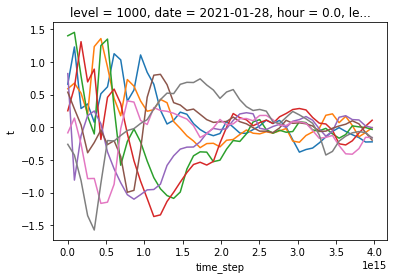

In [16]:
#ens_anom_t.isel(date=1).t.plot()
for m in range(0,8,1):
    ens_anom_t.isel(date=m).t.plot()

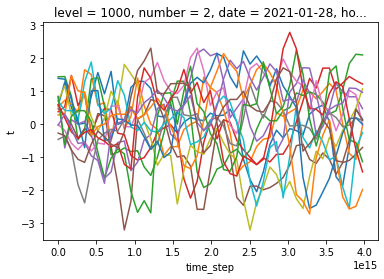

In [17]:
for m in range(0,2,1):
    for n in range(0,8,1):
#    at1_plt = anom_t.loc[dict(date=7,number=m)]
    #print(u_data_mem)
    # Specify how our lines should look
    #colorR = (m+2)/ 15.
#    ax.plot(u_data_mem.time, u_data_mem.values, color=(colorR,.2,1-colorR,), label='Mem '+str(m))
        anom_t.isel(number=m,date=n).t.plot()

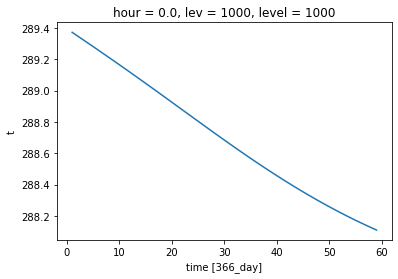

In [18]:
ct_rt_match.t.plot()

Text(0, 0.5, 'Temperature (K)')

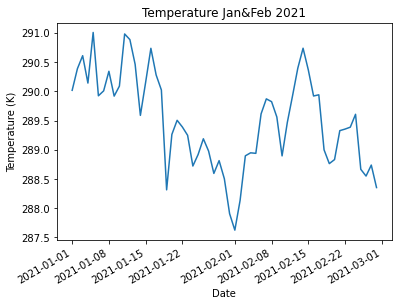

In [19]:
rt_llmn_ds.t.plot()
plt.title('Temperature Jan&Feb 2021')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')

Text(0, 0.5, 'Temperature Anomalies (K)')

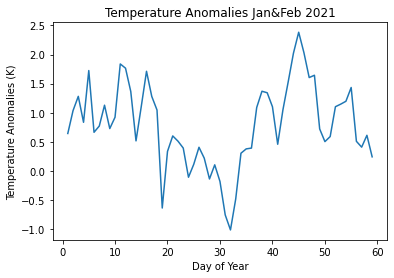

In [20]:
#Plotting the actual temperature anomalies
anom_rt_ds.plot(color='tab:blue')
plt.title('Temperature Anomalies Jan&Feb 2021')
plt.xlabel('Day of Year')
plt.ylabel('Temperature Anomalies (K)')

In [22]:
anom_rt_ds < -ct_std

<xarray.Dataset>
Dimensions:  (time: 59)
Coordinates:
    hour     float64 ...
    lev      int32 ...
    level    int32 1000
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 ... 50 51 52 53 54 55 56 57 58 59
Data variables:
    t        (time) bool False False False False ... False False False False

In [23]:
anom_rt_ds

<xarray.DataArray (time: 59)>
array([ 0.64416165,  1.03676736,  1.28172396,  0.83630285,  1.72451827,
        0.66481657,  0.77216271,  1.12984942,  0.7286761 ,  0.92283446,
        1.83800477,  1.76522442,  1.36559223,  0.51731407,  1.1068469 ,
        1.7120761 ,  1.28087075,  1.0472645 , -0.63544229,  0.33658581,
        0.60224204,  0.51201176,  0.39395028, -0.10682585,  0.11448008,
        0.40760784,  0.22095711, -0.13671032,  0.1060196 , -0.17973248,
       -0.75374663, -1.01141392, -0.47981681,  0.30543732,  0.37979121,
        0.39345818,  1.09069939,  1.36943643,  1.343366  ,  1.10342817,
        0.45923403,  1.05219447,  1.53065152,  2.02204664,  2.38235456,
        2.03097377,  1.60447632,  1.64403692,  0.72192608,  0.50453332,
        0.59153808,  1.10381766,  1.1476596 ,  1.19722553,  1.43382869,
        0.50932698,  0.4097514 ,  0.61298504,  0.24341864])
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 ... 50 51 52 53 54 55 56 57 58 59
Attributes:
    description:  Temperature Anomaly
    units:        Kelvin

In [24]:
#Calculating the % of correct forecasts for start of event
anom_t311 = anom_t.sel(step=anom_t.step.dt.days == 31)
cao_t1 = anom_t311 <= -.3 * std
cao1 = cao_t1 == True
ct1 = cao1.where(cao1.t == True)
ct1.sum().values
#per1 = 155/400 * 100

#anom_t312 = anom_t2.sel(step=anom_t2.step.dt.days == 31)
#cao_t2 = anom_t312 <= -.3 * std2
#cao2 = cao_t2 == True
#ct2 = cao2.where(cao2.t == True)
#ct2.sum().values
#per2 = 2/80 *100

#anom_t313 = anom_t3.sel(step=anom_t3.step.dt.days == 31)
#cao_t3 = anom_t313 <= -.3 * std3
#cao3 = cao_t3 == True
#ct3 = cao3.where(cao3.t == True)
#ct3.sum().values
#per3 = 20/93 *100

#anom_t314 = anom_t4.sel(step=anom_t4.step.dt.days == 31)
#cao_t4 = anom_t314 <= -.3 * std4
#cao4 = cao_t4 == True
#ct4 = cao4.where(cao4.t == True)
#ct4.sum().values
#per4 = 3/24 *100

#anom_t315 = anom_t5.sel(step=anom_t5.step.dt.days == 31)
#cao_t5 = anom_t315 <= -.3 * std5
#cao5 = cao_t5 == True
#ct5 = cao5.where(cao5.t == True)
#ct5.sum().values
#per5 = 76/196 *100

#anom_t316 = anom_t6.sel(step=anom_t6.step.dt.days == 31)
#cao_t6 = anom_t316 <= -.3 * std6
#cao6 = cao_t6 == True
#ct6 = cao6.where(cao6.t == True)
#ct6.sum().values
#per6 = 121/160 *100

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    level    int32 1000
    hour     float64 0.0
    lev      int32 1000
Data variables:
    t        float64 155.0>

In [25]:
anom_t311

<xarray.Dataset>
Dimensions:  (number: 50, step: 1, date: 8)
Coordinates:
    level    int32 1000
  * number   (number) int32 1 2 3 4 5 6 7 8 9 10 ... 42 43 44 45 46 47 48 49 50
  * step     (step) timedelta64[ns] 31 days
  * date     (date) datetime64[ns] 2021-01-04 2021-01-07 ... 2021-01-28
    time     (date, step) float64 35.0 38.0 42.0 45.0 49.0 52.0 56.0 59.0
    hour     float64 0.0
    lev      int32 1000
Data variables:
    t        (date, step, number) float64 -1.443 -1.902 ... -0.7685 0.9087

In [26]:
#Calculating the % of correct forecasts for duration of event
anom_tf1 = anom_t.isel(step=anom_t.step.dt.days.isin([31, 32, 33]))
cao_tf1 = anom_tf1 <= -.3 * std
caof1 = cao_tf1 == True
ct1f = caof1.where(caof1.t == True)
ct1f.sum().values
perf1 = 437/(3*400) * 100

anom_tf2 = anom_t2.isel(step=anom_t2.step.dt.days.isin([31, 32, 33]))
cao_tf2 = anom_tf2 <= -.3 * std2
caof2 = cao_tf2 == True
ct2f = caof2.where(caof2.t == True)
ct2f.sum().values
perf2 = 9/(3*80) *100

anom_tf3 = anom_t3.isel(step=anom_t3.step.dt.days.isin([31, 32, 33]))
cao_tf3 = anom_tf3 <= -.3 * std3
caof3 = cao_tf3 == True
ct3f = caof3.where(caof3.t == True)
ct3f.sum().values
perf3 = 59/(3*93) *100

anom_tf4 = anom_t4.isel(step=anom_t4.step.dt.days.isin([31, 32, 33]))
cao_tf4 = anom_tf4 <= -.3 * std4
caof4 = cao_tf4 == True
ct4f = caof4.where(caof4.t == True)
ct4f.sum().values
perf4 = 9/(3*24) *100

anom_tf5= anom_t5.isel(step=anom_t5.step.dt.days.isin([31, 32, 33]))
cao_tf5 = anom_tf5 <= -.3 * std5
caof5 = cao_tf5 == True
ct5f = caof5.where(caof5.t == True)
ct5f.sum().values
perf5 = 149/(3*196) *100

anom_tf6= anom_t6.isel(step=anom_t6.step.dt.days.isin([31, 32, 33]))
cao_tf6 = anom_tf6 <= -.3 * std6
caof6 = cao_tf6 == True
ct6f = caof6.where(caof6.t == True)
ct6f.sum().values
perf6 = 241/(3*160) *100

In [27]:
#Creating Slices in order to select dates that are in between these 5day ranges
s5 = slice("2021-01-27T00:00:00.000000000", "2021-01-31T00:00:00.000000000")
s10 = slice("2021-01-22T00:00:00.000000000", "2021-01-26T00:00:00.000000000")
s15 = slice("2021-01-17T00:00:00.000000000", "2021-01-21T00:00:00.000000000")
s20 = slice("2021-01-12T00:00:00.000000000", "2021-01-16T00:00:00.000000000")
s25 = slice("2021-01-07T00:00:00.000000000", "2021-01-11T00:00:00.000000000")
s30 = slice("2021-01-02T00:00:00.000000000", "2021-01-06T00:00:00.000000000")

In [28]:
anom_t311_s5 = anom_t.sel(date=s5, step=anom_t.step.dt.days == 31)
cao_t1_s5 = anom_t311_s5 <= -.3 * std
cao1_s5 = cao_t1_s5 == True
ct1_s5 = cao1_s5.where(cao1_s5.t == True)
ct1_s5.sum().values #(18)

anom_t312_s5 = anom_t2.sel(date=s5, step=anom_t2.step.dt.days == 31)
cao_t2_s5 = anom_t312_s5 <= -.3 * std2
cao2_s5 = cao_t2_s5 == True
ct2_s5 = cao2_s5.where(cao2_s5.t == True)
ct2_s5.sum().values #(0)

anom_t313_s5 = anom_t3.sel(date=s5, step=anom_t3.step.dt.days == 31)
cao_t3_s5 = anom_t313_s5 <= -.3 * std3
cao3_s5 = cao_t3_s5 == True
ct3_s5 = cao3_s5.where(cao3_s5.t == True)
ct3_s5.sum().values #(1)

anom_t314_s5 = anom_t4.sel(date=s5, step=anom_t4.step.dt.days == 31)
cao_t4_s5 = anom_t314_s5 <= -.3 * std4
cao4_s5 = cao_t4_s5 == True
ct4_s5 = cao4_s5.where(cao4_s5.t == True)
ct4_s5.sum().values #(1)

anom_t315_s5 = anom_t5.sel(date=s5, step=anom_t5.step.dt.days == 31)
cao_t5_s5 = anom_t315_s5 <= -.3 * std5
cao5_s5 = cao_t5_s5 == True
ct5_s5 = cao5_s5.where(cao5_s5.t == True)
ct5_s5.sum().values #(15)

anom_t316_s5 = anom_t6.sel(date=s5, step=anom_t6.step.dt.days == 31)
cao_t6_s5 = anom_t316_s5 <= -.3 * std6
cao6_s5 = cao_t6_s5 == True
ct6_s5 = cao6_s5.where(cao6_s5.t == True)
ct6_s5.sum().values #(29)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    level    int32 1000
    hour     float64 0.0
    lev      int32 1000
Data variables:
    t        float64 29.0>

In [29]:
anom_t311_s10 = anom_t.sel(date=s10, step=anom_t.step.dt.days == 31)
cao_t1_s10 = anom_t311_s10 <= -.3 * std
cao1_s10 = cao_t1_s10 == True
ct1_s10 = cao1_s10.where(cao1_s10.t == True)
cao_t1_s10
ct1_s10.sum().values #(15)

anom_t312_s10 = anom_t2.sel(date=s10, step=anom_t2.step.dt.days == 31)
cao_t2_s10 = anom_t312_s10 <= -.3 * std2
cao2_s10 = cao_t2_s10 == True
ct2_s10 = cao2_s10.where(cao2_s10.t == True)
cao_t2_s10
ct2_s10.sum().values #(1)

anom_t313_s10 = anom_t3.sel(date=s10, step=anom_t3.step.dt.days == 31)
cao_t3_s10 = anom_t313_s10 <= -.3 * std3
cao3_s10 = cao_t3_s10 == True
ct3_s10 = cao3_s10.where(cao3_s10.t == True)
cao3_s10
ct3_s10.sum().values #(2)

anom_t314_s10 = anom_t4.sel(date=s10, step=anom_t4.step.dt.days == 31)
cao_t4_s10 = anom_t314_s10 <= -.3 * std4
cao4_s10 = cao_t4_s10 == True
ct4_s10 = cao4_s10.where(cao4_s10.t == True)
cao_t4_s10
ct4_s10.sum().values #(0)

anom_t315_s10 = anom_t5.sel(date=s10, step=anom_t5.step.dt.days == 31)
cao_t5_s10 = anom_t315_s10 <= -.3 * std5
cao5_s10 = cao_t5_s10 == True
ct5_s10 = cao5_s10.where(cao5_s10.t == True)
cao_t5_s10
ct5_s10.sum().values #(0) 

anom_t316_s10 = anom_t6.sel(date=s10, step=anom_t6.step.dt.days == 31)
cao_t6_s10 = anom_t316_s10 <= -.3 * std6
cao6_s10 = cao_t6_s10 == True
ct6_s10 = cao6_s10.where(cao6_s10.t == True)
cao_t6_s10
ct6_s10.sum().values #(32)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    level    int32 1000
    hour     float64 0.0
    lev      int32 1000
Data variables:
    t        float64 0.0>

In [30]:
anom_t311_s15 = anom_t.sel(date=s15, step=anom_t.step.dt.days == 31)
cao_t1_s15 = anom_t311_s15 <= -.3 * std
cao1_s15 = cao_t1_s15 == True
ct1_s15 = cao1_s15.where(cao1_s15.t == True)
cao_t1_s15
ct1_s15.sum().values #(38)

anom_t312_s15 = anom_t2.sel(date=s15, step=anom_t2.step.dt.days == 31)
cao_t2_s15 = anom_t312_s15 <= -.3 * std2
cao2_s15 = cao_t2_s15 == True
ct2_s15 = cao2_s15.where(cao2_s15.t == True)
cao_t2_s15
ct2_s15.sum().values #(1)

anom_t313_s15 = anom_t3.sel(date=s15, step=anom_t3.step.dt.days == 31)
cao_t3_s15 = anom_t313_s15 <= -.3 * std3
cao3_s15 = cao_t3_s15 == True
ct3_s15 = cao3_s15.where(cao3_s15.t == True)
cao3_s15
ct3_s15.sum().values #(2)

anom_t314_s15 = anom_t4.sel(date=s15, step=anom_t4.step.dt.days == 31)
cao_t4_s15 = anom_t314_s15 <= -.3 * std4
cao4_s15 = cao_t4_s15 == True
ct4_s15 = cao4_s15.where(cao4_s15.t == True)
cao_t4_s15
ct4_s15.sum().values #(1)

anom_t315_s15 = anom_t5.sel(date=s15, step=anom_t5.step.dt.days == 31)
cao_t5_s15 = anom_t315_s15 <= -.3 * std5
cao5_s15 = cao_t5_s15 == True
ct5_s15 = cao5_s15.where(cao5_s15.t == True)
cao_t5_s15
ct5_s15.sum().values #(20) 

anom_t316_s15 = anom_t6.sel(date=s15, step=anom_t6.step.dt.days == 31)
cao_t6_s15 = anom_t316_s15 <= -.3 * std6
cao6_s15 = cao_t6_s15 == True
ct6_s15 = cao6_s15.where(cao6_s15.t == True)
cao_t6_s15
ct6_s15.sum().values #(32)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    level    int32 1000
    hour     float64 0.0
    lev      int32 1000
Data variables:
    t        float64 32.0>

In [31]:
anom_t311_s20 = anom_t.sel(date=s20, step=anom_t.step.dt.days == 31)
cao_t1_s20 = anom_t311_s20 <= -.3 * std
cao1_s20 = cao_t1_s20 == True
ct1_s20 = cao1_s20.where(cao1_s20.t == True)
cao_t1_s20
ct1_s20.sum().values #(18)

anom_t312_s20 = anom_t2.sel(date=s20, step=anom_t2.step.dt.days == 31)
cao_t2_s20 = anom_t312_s20 <= -.3 * std2
cao2_s20 = cao_t2_s20 == True
ct2_s20 = cao2_s20.where(cao2_s20.t == True)
cao_t2_s20
ct2_s20.sum().values #(0)

anom_t313_s20 = anom_t3.sel(date=s20, step=anom_t3.step.dt.days == 31)
cao_t3_s20 = anom_t313_s20 <= -.3 * std3
cao3_s20 = cao_t3_s20 == True
ct3_s20 = cao3_s20.where(cao3_s20.t == True)
cao3_s20
ct3_s20.sum().values #(5)

anom_t314_s20 = anom_t4.sel(date=s20, step=anom_t4.step.dt.days == 31)
cao_t4_s20 = anom_t314_s20 <= -.3 * std4
cao4_s20 = cao_t4_s20 == True
ct4_s20 = cao4_s20.where(cao4_s20.t == True)
cao_t4_s20
ct4_s20.sum().values #(0)

anom_t315_s20 = anom_t5.sel(date=s20, step=anom_t5.step.dt.days == 31)
cao_t5_s20 = anom_t315_s20 <= -.3 * std5
cao5_s20 = cao_t5_s20 == True
ct5_s20 = cao5_s20.where(cao5_s20.t == True)
cao_t5_s20
ct5_s10.sum().values #(0) 

anom_t316_s20 = anom_t6.sel(date=s20, step=anom_t6.step.dt.days == 31)
cao_t6_s20 = anom_t316_s20 <= -.3 * std6
cao6_s20 = cao_t6_s20 == True
ct6_s20 = cao6_s20.where(cao6_s20.t == True)
cao_t6_s20
ct6_s20.sum().values #(31)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    level    int32 1000
    hour     float64 0.0
    lev      int32 1000
Data variables:
    t        float64 31.0>

In [32]:
anom_t311_s25 = anom_t.sel(date=s25, step=anom_t.step.dt.days == 31)
cao_t1_s25 = anom_t311_s25 <= -.3 * std
cao1_s25 = cao_t1_s25 == True
ct1_s25 = cao1_s25.where(cao1_s25.t == True)
cao_t1_s25
ct1_s25.sum().values #(43)

anom_t312_s25 = anom_t2.sel(date=s25, step=anom_t2.step.dt.days == 31)
cao_t2_s25 = anom_t312_s25 <= -.3 * std2
cao2_s25 = cao_t2_s25 == True
ct2_s25 = cao2_s25.where(cao2_s25.t == True)
cao_t2_s25
ct2_s25.sum().values #(1)

anom_t313_s25 = anom_t3.sel(date=s25, step=anom_t3.step.dt.days == 31)
cao_t3_s25 = anom_t313_s25 <= -.3 * std3
cao3_s25 = cao_t3_s25 == True
ct3_s25 = cao3_s25.where(cao3_s25.t == True)
cao3_s25
ct3_s25.sum().values #(3)

anom_t314_s25 = anom_t4.sel(date=s25, step=anom_t4.step.dt.days == 31)
cao_t4_s25 = anom_t314_s25 <= -.3 * std4
cao4_s25 = cao_t4_s25 == True
ct4_s25 = cao4_s25.where(cao4_s25.t == True)
cao_t4_s25
ct4_s25.sum().values #(1)

anom_t315_s25 = anom_t5.sel(date=s25, step=anom_t5.step.dt.days == 31)
cao_t5_s25 = anom_t315_s25 <= -.3 * std5
cao5_s25 = cao_t5_s25 == True
ct5_s25 = cao5_s25.where(cao5_s25.t == True)
cao_t5_s25
ct5_s25.sum().values #(0) 

anom_t316_s25 = anom_t6.sel(date=s25, step=anom_t6.step.dt.days == 31)
cao_t6_s25 = anom_t316_s25 <= -.3 * std6
cao6_s25 = cao_t6_s25 == True
ct6_s25 = cao6_s25.where(cao6_s25.t == True)
cao_t6_s25
ct6_s25.sum().values #(29)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    level    int32 1000
    hour     float64 0.0
    lev      int32 1000
Data variables:
    t        float64 29.0>

In [33]:
anom_t311_s30 = anom_t.sel(date=s30, step=anom_t.step.dt.days == 31)
cao_t1_s30 = anom_t311_s30 <= -.3 * std
cao1_s30 = cao_t1_s30 == True
ct1_s30 = cao1_s30.where(cao1_s30.t == True)
cao_t1_s30
ct1_s30.sum().values #(17)

anom_t312_s30 = anom_t2.sel(date=s30, step=anom_t2.step.dt.days == 31)
cao_t2_s30 = anom_t312_s30 <= -.3 * std2
cao2_s30 = cao_t2_s30 == True
ct2_s30 = cao2_s30.where(cao2_s30.t == True)
cao_t2_s30
ct2_s30.sum().values #(0)

anom_t313_s30 = anom_t3.sel(date=s30, step=anom_t3.step.dt.days == 31)
cao_t3_s30 = anom_t313_s30 <= -.3 * std3
cao3_s30 = cao_t3_s30 == True
ct3_s30 = cao3_s30.where(cao3_s30.t == True)
cao3_s30
ct3_s30.sum().values #(5)

anom_t314_s30 = anom_t4.sel(date=s30, step=anom_t4.step.dt.days == 31)
cao_t4_s30 = anom_t314_s30 <= -.3 * std4
cao4_s30 = cao_t4_s30 == True
ct4_s30 = cao4_s30.where(cao4_s30.t == True)
cao_t4_s30
ct4_s30.sum().values #(0)

anom_t315_s30 = anom_t5.sel(date=s30, step=anom_t5.step.dt.days == 31)
cao_t5_s30 = anom_t315_s30 <= -.3 * std5
cao5_s30 = cao_t5_s30 == True
ct5_s30 = cao5_s30.where(cao5_s30.t == True)
cao_t5_s30
ct5_s30.sum().values #(24) 

anom_t316_s30 = anom_t6.sel(date=s30, step=anom_t6.step.dt.days == 31)
cao_t6_s30 = anom_t316_s30 <= -.3 * std6
cao6_s30 = cao_t6_s30 == True
ct6_s30 = cao6_s30.where(cao6_s30.t == True)
cao_t6_s30
ct6_s30.sum().values #(0)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    level    int32 1000
    hour     float64 0.0
    lev      int32 1000
Data variables:
    t        float64 0.0>

In [34]:
#Calc % s5
per1_s5 = (18/(50*1))*100
per2_s5 = 0/(20*1)*100
per3_s5 = (1/(3*5))*100
per4_s5 = 0/(3*1)*100
per5_s5 = 0/(49*1)*100
per6_s5 = (32/(40*1))*100

#Calc % s10
per1_s10 = (15/(50*1))*100
per2_s10 = False #<--no model runs over this time
per3_s10 = (2/(3*5))*100
per4_s10 = (0/(3*1))*100
per5_s10 = False #<--no model runs over this time period
per6_s10 = False #<-- no model run during this time

#Calc % s15
per1_s15 = (44/(50*2))*100
per2_s15 = (1/(20*1))*100
per3_s15 = (3/(3*5))*100
per4_s15 = (1/(3*2))*100
per5_s15 = (20/(49*1))*100
per6_s15 = (32/(40*1))*100

#Calc % s20
per1_s20 = (18/(50*1))*100
per2_s20 = (0/(20*1))*100
per3_s20 = (5/(3*5))*100
per4_s20 = (0/(3*1))*100
per5_s20 = (0/(49*1))*100
per6_s20 = (31/(40*1))*100

#Calc % s25
per1_s25 = (43/(50*2))*100
per2_s25 = (1/(20*1))*100
per3_s25 = (3/(3*5))*100
per4_s25 = (1/(3*2))*100
per5_s25 = False #<--no date
per6_s25 = (29/(40*1))*100

#Calc % s30
per1_s30 = (17/(50*1))*100
per2_s30 = False #<--no date
per3_s30 = (5/(3*5))*100
per4_s30 = (0/(3*1))*100
per5_s30 = (24/(49*1))*100 
per6_s30 = False #<--no date

In [35]:
htm_avg = (per1 + per3 + per5)/3
ltm_avg = (per2 + per4 + per6)/3
htm_avg_s5 = (per1_s5 + per3_s5 + per5_s5)/3
ltm_avg_s5 = (per2_s5 + per4_s5 + per6_s5)/3
htm_avg_s10 = (per1_s10 + per3_s10 + per5_s10)/2 
ltm_avg_s10 = (per2_s10 + per4_s10 + per6_s10)/1 
htm_avg_s15 = (per1_s15 + per3_s15 + per5_s15)/3 
ltm_avg_s15 = (per2_s15 + per4_s15 + per6_s15)/3 
htm_avg_s20 = (per1_s20 + per3_s20 + per5_s20)/3
ltm_avg_s20 = (per2_s20 + per4_s20 + per6_s20)/3
htm_avg_s25 = (per1_s25 + per3_s25 + per5_s25)/2
ltm_avg_s25 = (per2_s25 + per4_s25 + per6_s25)/3
htm_avg_s30 = (per1_s30 + per3_s30 + per5_s30)/3
ltm_avg_s30 = (per2_s30 + per4_s30 + per6_s30)/1
htmf_avg = (perf1 + perf3 + perf5)/3
ltmf_avg = (perf2 + perf4 + perf6)/3
htm_avg_s25

NameError: name 'per1' is not defined

In [ ]:
print('Predicting 1st Day')
print(f'ECMWF correct = {per1}')
print(f'ECCC correct = {per2}')
print(f'UKMO correct = {per3}')
print(f'CMA correct = {per4}')
print(f'JMA correct = {per5}')
print(f'CNR correct = {per6}')
print(f'High-top Avg = {htm_avg}')
print(f'Low-top Avg = {ltm_avg}')
print('Predicting Entirety of Event')
print(f'ECMWF correct = {perf1}')
print(f'ECCC correct = {perf2}')
print(f'UKMO correct = {perf3}')
print(f'CMA correct = {perf4}')
print(f'JMA correct = {perf5}')
print(f'CNR correct = {perf6}')
print(f'High-top Avg = {htmf_avg}')
print(f'Low-top Avg  = {ltmf_avg}')
print('Average Percentages for different lead times')
print(f'High-top Avg s5= {htm_avg_s5}')
print(f'Low-top Avg s5= {ltm_avg_s5}')
print(f'High-top Avg s10= {htm_avg_s10}')
print(f'Low-top Avg s10= {ltm_avg_s10}')
print(f'High-top Avg s15= {htm_avg_s15}')
print(f'Low-top Avg s15= {ltm_avg_s15}')
print(f'High-top Avg s20= {htm_avg_s20}')
print(f'Low-top Avg s20= {ltm_avg_s20}')
print(f'High-top Avg s25= {htm_avg_s25}')
print(f'Low-top Avg s25= {ltm_avg_s25}')
print(f'High-top Avg s30= {htm_avg_s30}')
print(f'Low-top Avg s30= {ltm_avg_s30}')

In [ ]:
per_arr=([per1_s5, per2_s5, per3_s5, per4_s5, per5_s5, per6_s5],
        [per1_s10, per2_s10, per3_s10, per4_s10, per5_s10, per6_s10],
        [per1_s15, per2_s15, per3_s15, per4_s15, per5_s15, per6_s15],
        [per1_s20, per2_s20, per3_s20, per4_s20, per5_s20, per6_s20],
        [per1_s25, per2_s25, per3_s25, per4_s25, per5_s25, per6_s25],
        [per1_s30, per2_s30, per3_s30, per4_s30, per5_s30, per6_s30],)
per_arr[3]
#Need to change to order of the array, per1--> and 

In [ ]:
per_arr2=(([per1_s5, per1_s10, per1_s15, per1_s20, per1_s25, per1_s30]),
        ([per2_s5, per2_s10, per2_s15, per2_s20, per2_s25, per2_s30]),
        ([per3_s5, per3_s10, per3_s15, per3_s20, per3_s25, per3_s30]),
        ([per4_s5, per4_s10, per4_s15, per4_s20, per4_s25, per4_s30]),
        ([per5_s5, per5_s10, per5_s15, per5_s20, per5_s25, per5_s30]),
        ([per6_s5, per6_s10, per6_s15, per6_s20, per6_s25, per6_s30]))
#        ([5,10,15,20,25,30]))
per_arr2

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(per_arr2[0])#, bins = [0, 5, 10, 15, 20, 25, 30])
 
# Show plot
plt.show()

In [ ]:
per_arr2.hist()

I'm not sure if I should be comparing the models with their own standard deviations or the ERA5 standard deviations. Also, should the anomalies be calculated with the models - the climo, or should it be the models - the ERA5(the real event) and keep the event anomalies era5-climo?